# Perpustakaan Pencitraan Python (PIL)

Menyediakan penanganan gambar umum dan banyak hal berguna seperti pengoperasian gambar dasar seperti mengubah ukuran, memotong, memutar, mengubah warna, dan banyak lagi.

PIL gratis dan tersedia dari http://www.pythonware.com/products/pil/. Dengan PIL kita dapat membaca gambar dari sebagian besar format dan menulis ke format yang paling umum. Modul yang paling penting adalah modul Gambar. Untuk membaca gambar gunakan:


In [40]:
# install package PIL

!pip install pillow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from PIL import Image

pil_im = Image.open('empire.jpg')


Nilai yang dikembalikan, pil_im, adalah objek gambar PIL. Konversi warna dilakukan dengan menggunakan metode convert(). Untuk membaca gambar dan mengubahnya menjadi skala abu-abu, cukup tambahkan convert('L') seperti ini:


In [42]:
pil_im = Image.open('empire.jpg').convert('L')


## Plotting images, points and lines

Meskipun dimungkinkan untuk membuat plot batang yang bagus, diagram lingkaran, plot pencar, dll., Hanya sedikit perintah diperlukan untuk sebagian besar tujuan visi komputer. Yang terpenting, kita ingin
untuk dapat menunjukkan hal-hal seperti poin *interest* (minat), korespondensi, dan objek yang terdeteksi menggunakan titik dan garis. Berikut adalah contoh memplot gambar dengan beberapa titik dan sebuah garis.


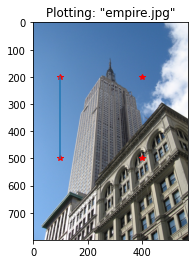

In [43]:
from PIL import Image
from pylab import *

# read image to array
im = array(Image.open('empire.jpg'))

# plot the image
imshow(im)

# some points
x = [100,100,400,400]
y = [200,500,200,500]

# plot the points with red star-markers
plot(x,y,'r*')

# line plot connecting the first two points
plot(x[:2],y[:2])

# add title and show the plot
title('Plotting: "empire.jpg"')
show()


(0.5, 568.5, 0.5, 799.5)

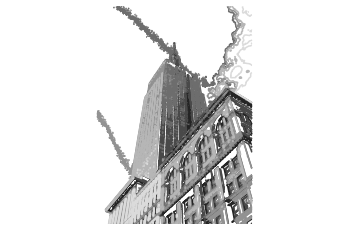

In [44]:
from PIL import Image
from pylab import *

# read image to array
im = array(Image.open('empire.jpg').convert('L'))

# create a new figure
figure()

# don’t use colors
gray()

# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')


Seperti sebelumnya, metode PIL convert() melakukan konversi ke skala abu-abu.

Histogram gambar adalah plot yang menunjukkan distribusi nilai piksel. Sejumlah bins ditentukan untuk rentang nilai dan setiap bin mendapatkan jumlah piksel memiliki nilai dalam kisaran bin. Visualisasi histogram gambar (tingkat keabuan) adalah dilakukan dengan menggunakan fungsi `hist()`.


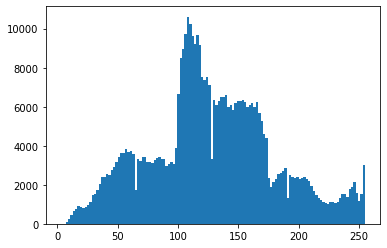

In [45]:
figure()
hist(im.flatten(),128)
show()


Argumen kedua menentukan jumlah tempat sampah yang akan digunakan. Perhatikan bahwa gambar perlu
diratakan terlebih dahulu, karena `hist()` mengambil array satu dimensi sebagai masukan. Metode `flatten()` mengonversi larik apa pun menjadi larik satu dimensi dengan nilai yang diambil berdasarkan baris.

Gambar berikut menunjukkan plot kontur dan histogram.


## Anotasi Interaktif

Terkadang pengguna perlu berinteraksi dengan aplikasi, misalnya dengan menandai titik dalam sebuah gambar, atau kita perlu memberi anotasi pada beberapa data pelatihan. PyLab hadir dengan sederhana fungsi, `ginput()`, yang memungkinkan kita melakukan hal itu.


Please click 3 points
you clicked: []


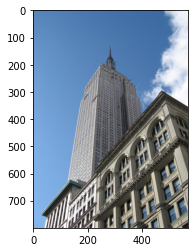

In [46]:
from PIL import Image
from pylab import *

im = array(Image.open('empire.jpg'))

imshow(im)

print('Please click 3 points')
x = ginput(3)

print('you clicked:', x)
show()


## Representasi Gambar Array

Saat kita memuat gambar di contoh sebelumnya, kita mengonversinya menjadi larik NumPy objek dengan panggilan 'array()' tetapi tidak menyebutkan apa artinya. Array di NumPy adalah multidimensi dan dapat mewakili vektor, matriks, dan gambar.

Array sangat mirip dengan list (atau list dari list) tetapi dibatasi untuk memiliki semua elemen dari tipe yang sama. Kecuali ditentukan pada pembuatan, tipe akan secara otomatis diatur tergantung pada data.
Contoh berikut mengilustrasikan ini untuk gambar.


In [47]:
im = array(Image.open('empire.jpg'))
print(im.shape, im.dtype)

im = array(Image.open('empire.jpg').convert('L'),'f')
print(im.shape, im.dtype)


(800, 569, 3) uint8
(800, 569) float32


Tuple pertama pada setiap baris adalah bentuk array gambar (baris, kolom, warna saluran), dan string berikut adalah tipe data dari elemen array. Gambar-gambar biasanya dikodekan dengan bilangan bulat 8-bit yang tidak ditandatangani (uint8), jadi memuat gambar ini dan mengonversi ke array memberikan tipe "uint8" dalam kasus pertama. Kasus kedua tidak
konversi skala abu-abu dan membuat larik dengan argumen tambahan "f". Ini pendek perintah untuk mengatur tipe ke floating point. Perhatikan bahwa gambar skala abu-abu hanya memiliki dua nilai dalam shape tuple; jelas itu tidak ada keterangan warna.
Elemen dalam array diakses dengan indeks. Nilai pada koordinat i,j dan saluran warna k diakses seperti ini:


In [48]:
# im[i,:] = im[j,:] # set the values of row i with values from row j
# im[:,i] = 100 # set all values in column i to 100
im[:100,:50].sum() # the sum of the values of the first 100 rows and 50 columns
im[50:100,50:100] # rows 50-100, columns 50-100 (100th not included)
# im[i].mean() # average of row i
im[:,-1] # last column
# im[-2,:] or im[-2] # second to last row


array([247., 247., 247., 245., 243., 244., 244., 242., 243., 242., 242.,
       243., 243., 242., 242., 243., 243., 242., 241., 243., 242., 243.,
       243., 244., 244., 243., 242., 242., 242., 242., 241., 240., 239.,
       239., 239., 240., 239., 238., 239., 238., 237., 237., 233., 234.,
       230., 231., 230., 230., 228., 228., 225., 225., 224., 222., 223.,
       223., 223., 223., 222., 218., 218., 219., 218., 218., 218., 219.,
       218., 217., 216., 215., 217., 219., 221., 223., 228., 229., 232.,
       232., 235., 235., 237., 237., 239., 239., 240., 240., 239., 240.,
       240., 242., 241., 242., 242., 240., 240., 239., 238., 237., 236.,
       236., 235., 236., 237., 239., 239., 241., 241., 241., 243., 243.,
       242., 242., 242., 241., 241., 242., 243., 243., 243., 243., 243.,
       242., 241., 240., 239., 238., 236., 234., 235., 234., 235., 236.,
       237., 239., 240., 240., 241., 241., 240., 239., 239., 239., 240.,
       240., 243., 243., 243., 242., 243., 243., 24

Seperti yang sudah dijelaskan pada bagian slicing (pemotongan) array.


### Transformasi Graylevel

Setelah membaca gambar ke array NumPy, kita dapat melakukan operasi matematika apa pun kepada data array tersebut. Contoh sederhananya adalah mengubah tingkat abu-abu suatu gambar. Mengambil setiap fungsi f yang memetakan interval 0 . . . 255 (atau jika kita suka 0 . . . 1) untuk dirinya sendiri (artinya bahwa output memiliki rentang yang sama dengan input). Berikut beberapa contohnya.


In [49]:
from PIL import Image
from numpy import *

im = array(Image.open('empire.jpg').convert('L'))

im2 = 255 - im                # invert image

im3 = (100.0/255) * im + 100  # clamp to interval 100...200

im4 = 255.0 * (im/255.0)**2   # squared


Contoh pertama membalikkan tingkat keabuan gambar, yang kedua menjepit intensitas ke interval 100 . . . 200 dan yang ketiga menerapkan fungsi kuadrat, yaitu
menurunkan nilai piksel yang lebih gelap. Kita dapat memeriksa nilai minimum dan maksimum dari setiap gambar
menggunakan:


In [50]:
print(int(im.min()), int(im.max()))
print(int(im2.min()), int(im2.max()))
print(int(im3.min()), int(im3.max()))
print(int(im4.min()), int(im4.max()))

3 255
0 252
101 200
0 255


Kebalikan dari transformasi `array()` dapat dilakukan dengan menggunakan fungsi PIL `fromarray()`
sebagai:


In [51]:
pil_im = Image.fromarray(im)


Jika kita melakukan beberapa operasi untuk mengubah tipe dari "uint8" ke tipe data lain, untuk contoh sebagai im3 atau im4 pada contoh di atas, kita perlu mengonversi kembali sebelum membuat gambar PIL.


In [52]:
pil_im = Image.fromarray(uint8(im))
